In [1]:
# 1. Clone the official implementation
!git clone https://github.com/buptLinfy/ZSE-SBIR.git
%cd ZSE-SBIR

Cloning into 'ZSE-SBIR'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 170 (delta 34), reused 20 (delta 20), pack-reused 123 (from 1)
Receiving objects: 100% (170/170), 9.51 MiB | 5.01 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Updating files: 100% (55/55), done.
/content/ZSE-SBIR


In [2]:
# Install gdown if not already present
!pip install gdown

# Create directories
!mkdir -p model checkpoint/sketchy_ext

# Download ViT backbone into model/
!gdown --id 1bznKsXDM5-xaUR9suCBBc7J33lIa70zJ \
       -O model/sam_ViT-B_16.pth

# Download best Sketchy‑Ext checkpoint into checkpoint/
!gdown --id 16HAlzuibGoQhhozcz4_vVO3rGZEyLqcw \
       -O checkpoint/sketchy_ext/best_checkpoint.pth

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1bznKsXDM5-xaUR9suCBBc7J33lIa70zJ
From (redirected): https://drive.google.com/uc?id=1bznKsXDM5-xaUR9suCBBc7J33lIa70zJ&confirm=t&uuid=4d922473-d51b-468c-a940-dd1b8e16ee52
To: /content/ZSE-SBIR/model/sam_ViT-B_16.pth
100% 346M/346M [00:08<00:00, 42.3MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=16HAlzuibGoQhhozcz4_vVO3rGZEyLqcw
From (redirected): https://drive.google.com/uc?id=16HAlzuibGoQhhozcz4_vVO3rGZEyLqcw&confirm=t&uuid=064f0d2b-86f9-4e19-ae13-216a0c777d67
To: /con

In [3]:
# Create dataset folder
!mkdir -p datasets

# Sketchy (Sketchy_Extend split)
!gdown --id 11GAr0jrtowTnR3otyQbNMSLPeHyvecdP \
       -O datasets/sketchy_ext.tar.gz
!tar -zxvf datasets/sketchy_ext.tar.gz -C datasets



Streaming output truncated to the last 5000 lines.
Sketchy/EXTEND_image_sketchy_ready/castle/ext_163.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_383.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_384.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_251.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_234.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_440.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_126.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/n02980441_6082.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_132.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_97.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_290.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_100.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_287.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_463.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_369.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_272.jpg
Sketchy/EXTEND_image_sketchy_ready/castle/ext_317.jpg
Sketchy/EXTEND_image_sket

In [4]:
!pip install tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.6 MB/s eta 0:00:00


In [5]:
# from inside /content/ZSE-SBIR
!cp /content/ZSE-SBIR/model/sam_ViT-B_16.pth ./sam_ViT-B_16.pth

In [6]:
# In a separate code cell at the top of your notebook:
%cd /content/ZSE-SBIR


/content/ZSE-SBIR


In [7]:
from PIL import Image
import os, glob

sketch_root = "/content/ZSE-SBIR/datasets/Sketchy/256x256/sketch"

for class_tx in os.listdir(sketch_root):
    class_tx_dir = os.path.join(sketch_root, class_tx)
    if not os.path.isdir(class_tx_dir): continue
    for cls in os.listdir(class_tx_dir):
        cls_dir = os.path.join(class_tx_dir, cls)
        for png_path in glob.glob(os.path.join(cls_dir, "*.png")):
            img = Image.open(png_path).convert("RGB")
            jpg_path = png_path[:-4] + ".jpg"
            img.save(jpg_path, quality=95)
            os.remove(png_path)


In [13]:
pwd

'/content/ZSE-SBIR'

In [ ]:
ls

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


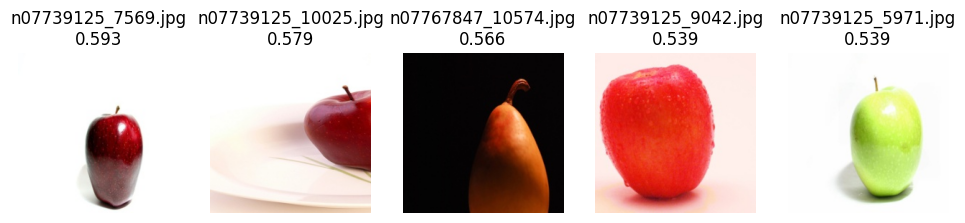

In [25]:
import sys, os
sys.path.append("/content/ZSE-SBIR")    # so Python can see options.py, model/, utils/
# In your Colab cell, at the very top:
sys.argv = [sys.argv[0]]

from options import Option
from model.model import Model
from utils.util import load_checkpoint

args = Option().parse()   # now safe!
args.load = "/content/ZSE-SBIR/checkpoint/sketchy_ext/best_checkpoint.pth"
# … rest of your code …


import torch
from torch.utils.data   import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from PIL import Image
from options       import Option
from model.model   import Model
from utils.util    import load_checkpoint
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

# 1) Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # 2) Load your trained SBIR model
# args = Option().parse()
# args.load = "/content/ZSE-SBIR/model/sam_ViT-B_16.pth"   # YOUR SBIR-trained checkpoint
os.environ["CUDA_VISIBLE_DEVICES"] = args.choose_cuda
model = Model(args).to(device)
import torch
# full-load with weights_only=False to allow the “model” key
ckpt = torch.load(args.load, map_location=device, weights_only=False)

# Only keep the keys that actually match
state = {k:v for k,v in ckpt['model'].items() if k in model.state_dict()}
model.load_state_dict(state, strict=False)
model.eval()

# 3) Preprocess transform (same as before)
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225],
    ),
])

# 4) Build your photo‐gallery embeddings
gallery_root = "/content/ZSE-SBIR/datasets/Sketchy/256x256/photo"
ds    = ImageFolder(gallery_root, transform=preprocess)
ldr   = DataLoader(ds, batch_size=64, shuffle=False, num_workers=4)
paths = [p for p,_ in ds.samples]

gallery_feats = []
# a zero‐sketch placeholder; we'll only pull out the image‐branch CLS token
dummy_sk = torch.zeros(1,3,224,224).to(device)

with torch.no_grad():
    for imgs,_ in ldr:
        B = imgs.size(0)
        imgs = imgs.to(device)
        # model(sketches, photos, stage='test', only_sa=True) → (sa_feats, _)
        sa_feats, _ = model(imgs, dummy_sk.repeat(B,1,1,1), stage='test', only_sa=True)
        # take CLS token
        gallery_feats.append(sa_feats[:,0].cpu())
gallery_feats = torch.cat(gallery_feats, 0).numpy()  # shape: [N_photos,768]

# 5) Embed your *sketch* query
sketch_path = "/content/ZSE-SBIR/datasets/Sketchy/256x256/sketch/tx_000000000000_ready/apple/n07739125_10025-1.jpg"
sk = Image.open(sketch_path).convert("RGB")
sk_t = preprocess(sk).unsqueeze(0).to(device)

with torch.no_grad():
    sa_q, _ = model(sk_t, dummy_sk, stage='test', only_sa=True)
query_vec = sa_q[:,0].cpu().numpy()  # [1,768]

# 6) Cosine‐sim and top‐k
sims = cosine_similarity(query_vec, gallery_feats)[0]
topk = 5
ids  = sims.argsort()[::-1][:topk]

# 7) Plot the photos that *actually* match your sketch
plt.figure(figsize=(12,4))
for i, idx in enumerate(ids):
    p   = paths[idx]
    score = sims[idx]
    im  = mpimg.imread(p)
    ax  = plt.subplot(1,topk,i+1)
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(f"{os.path.basename(p)}\n{score:.3f}")
plt.show()


In [27]:
pwd

'/content/ZSE-SBIR'